In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [11]:
df = pd.read_csv(r'C:/Users/test/Documents/tochora/baba/fake_or_real_news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [12]:
mapping = {'FAKE':1,'REAL':0}
df['label'] = df['label'].apply(lambda x : mapping[x])
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0


In [13]:
df['content'] = df['title']+' '+df['text']
df.head()

,Unnamed: 0,title,text,label,content
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1,You Can Smell Hillary’s Fear Daniel Greenfield...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,Watch The Exact Moment Paul Ryan Committed Pol...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0,Kerry to go to Paris in gesture of sympathy U....
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1,Bernie supporters on Twitter erupt in anger ag...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0,The Battle of New York: Why This Primary Matte...


In [14]:
df = df[['content','label']]
df.head()

,content,label
0,You Can Smell Hillary’s Fear Daniel Greenfield...,1
1,Watch The Exact Moment Paul Ryan Committed Pol...,1
2,Kerry to go to Paris in gesture of sympathy U....,0
3,Bernie supporters on Twitter erupt in anger ag...,1
4,The Battle of New York: Why This Primary Matte...,0


<AxesSubplot:xlabel='label', ylabel='count'>

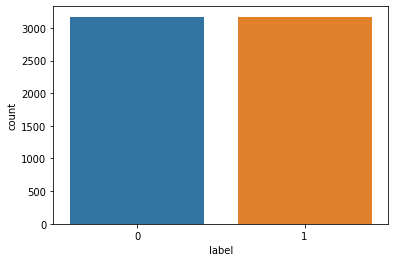

In [8]:
sns.countplot(x=df['label'])

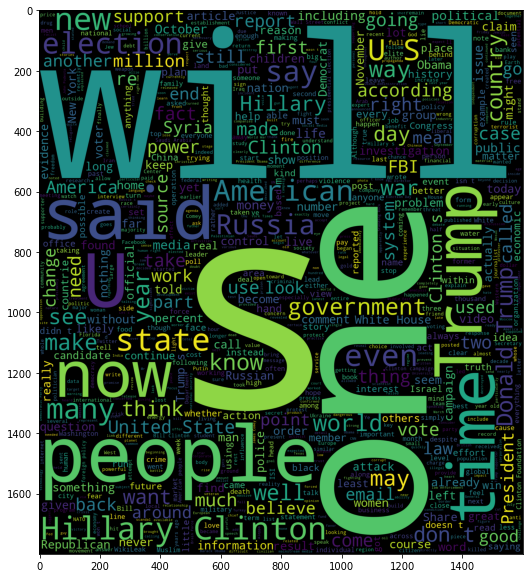

In [43]:
from wordcloud import WordCloud
plt.figure(figsize=(15, 10))
wm = WordCloud(max_words=2000, min_font_size=10,height=1800, width=1600,background_color='black').generate(
    " ".join(df[df['label']==1].content)
)
plt.title('Words prominent in fake news')
plt.imshow(wm)

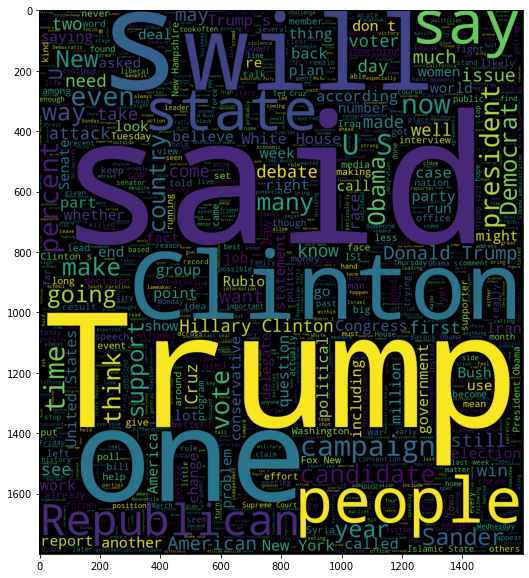

In [44]:
plt.figure(figsize=(15, 10))
wm = WordCloud(max_words=2000, min_font_size=10,height=1800, width=1600,background_color='black').generate(
    " ".join(df[df['label']==0].content)
)
plt.title('words prominent in Real news')
plt.imshow(wm)

In [27]:
import re
ps = PorterStemmer()
def stemming(content):
    textt = re.sub(r'[^a-zA-Z]', ' ', content)
    textt = textt.lower()
    textt = textt.split()
    textt = [ps.stem(word) for word in textt if word not in stopwords.words('english')]
    textt = " ".join(textt)
    return textt

In [20]:
#df.drop('label',axis=1,inplace=True)
#df.head()

In [14]:
df['content'] = df['content'].apply(stemming)

In [28]:
df['content']

0       You Can Smell Hillary’s Fear Daniel Greenfield...
1       Watch The Exact Moment Paul Ryan Committed Pol...
2       Kerry to go to Paris in gesture of sympathy U....
3       Bernie supporters on Twitter erupt in anger ag...
4       The Battle of New York: Why This Primary Matte...
                              ...                        
6330    State Department says it can't find emails fro...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332    Anti-Trump Protesters Are Tools of the Oligarc...
6333    In Ethiopia, Obama seeks progress on peace, se...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: content, Length: 6335, dtype: object

In [29]:
df.head()

,content,label
0,You Can Smell Hillary’s Fear Daniel Greenfield...,1
1,Watch The Exact Moment Paul Ryan Committed Pol...,1
2,Kerry to go to Paris in gesture of sympathy U....,0
3,Bernie supporters on Twitter erupt in anger ag...,1
4,The Battle of New York: Why This Primary Matte...,0


In [30]:
x = df['content'].values
y = df['label'].values

In [32]:
print(x[0])

You Can Smell Hillary’s Fear Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. 
In the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. 
The word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. 
But that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. 
The FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. 
The FBI’s leadership is bein

In [40]:
tfid = TfidfVectorizer(ngram_range=(2,2), max_features=10000)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=20)
x_train = tfid.fit_transform(x_train)
x_test = tfid.transform(x_test)

In [41]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)
print(acc)

0.9128787878787878
